# Tratamento

## Imports

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/drive/MyDrive/MLcP_udemy/housing.csv',
                 sep=',', encoding='iso-8859-1')

In [4]:
df.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


**Previsores**  
RM = room mean; media de comodos nos imoveis  
LSTAT: porcentagem de proprietarios considerados
"classe baixa"  
PTRATIO: razao entre estudantes e professores nas escolas  
  
**Alvo**  
MEDV: valor médio das casas

## Análise

In [5]:
df.describe()
# aparentemente, nenhum valor incoerente.

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [6]:
import plotly.express as px

In [7]:
boxplot = px.box(df,y="RM")
boxplot.show()
# os outliers nao vao chegar a distorcer alguma coisa... nao estao tao longe, tao fora do normal

In [8]:
boxplot = px.box(df,y="LSTAT")
boxplot.show()
# idem ao de cima

In [9]:
boxplot = px.box(df,y="PTRATIO")
boxplot.show()
# idem

In [10]:
boxplot = px.box(df,y="MEDV")
boxplot.show()
# idem

# Correlação Linear

**Previsores**  
RM = media de comodos nos imoveis  
LSTAT: porcentagem de proprietarios considerados
"classe baixa"  
PTRATIO: razao entre estudantes e professores nas escolas  
  
**Alvo**  
MEDV: valor médio das casas

## Visualização Gráfica

In [11]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Valor Médio')

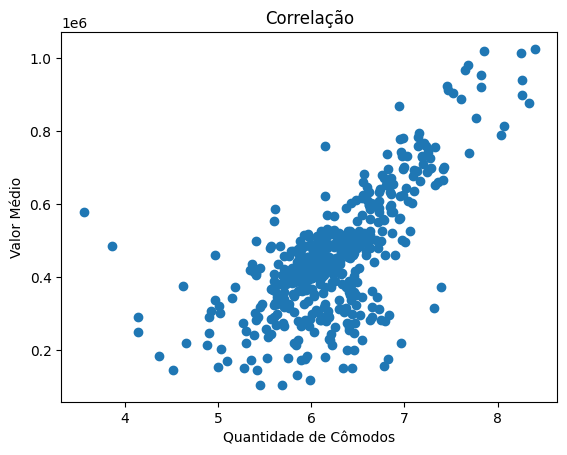

In [12]:
plt.scatter(df.RM,df.MEDV)
plt.title('Correlação')
plt.xlabel('Quantidade de Cômodos')
plt.ylabel('Valor Médio')
# ta na cara que é linear positiva/crescente. quanto mais comodos, maior o valor da casa: isso é evidente.

Text(0, 0.5, 'Valor Médio')

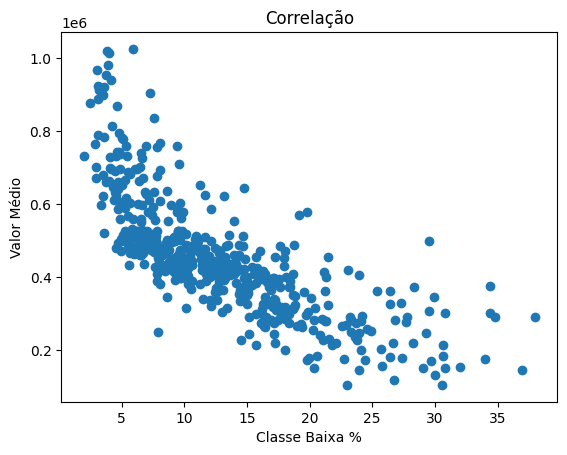

In [13]:
plt.scatter(df.LSTAT,df.MEDV)
plt.title('Correlação')
plt.xlabel('Classe Baixa %')
plt.ylabel('Valor Médio')
# evidente que tb é linear, só q negativa

Text(0, 0.5, 'Valor Médio')

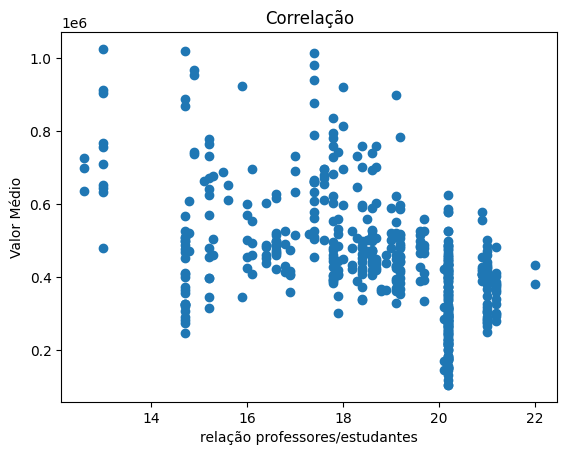

In [14]:
plt.scatter(df.PTRATIO,df.MEDV)
plt.title('Correlação')
plt.xlabel('relação professores/estudantes')
plt.ylabel('Valor Médio')
# hmm...... aparentemente sem correlação

In [15]:
import seaborn as sns

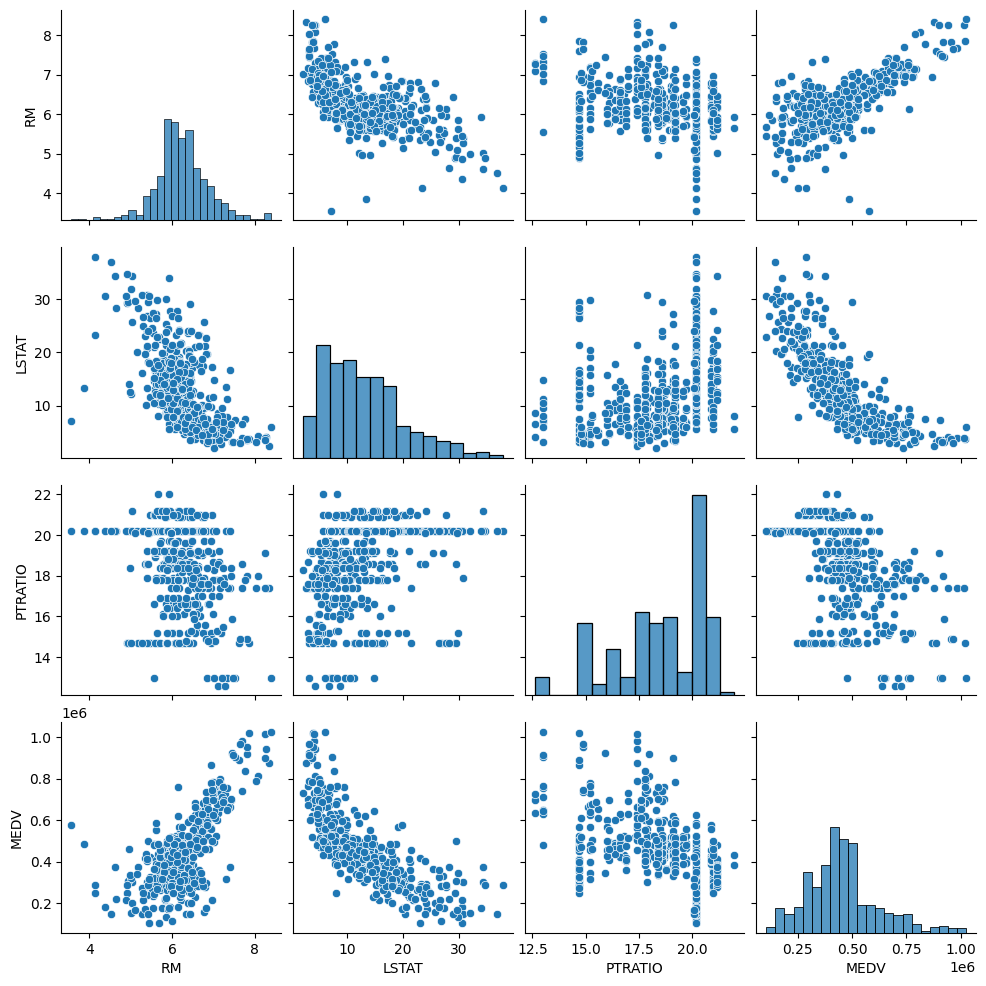

In [16]:
sns.pairplot(df)
# plota todas as relações possiveis

## Análise da Normalidade

### Probability Plot

In [17]:
import scipy.stats as stats

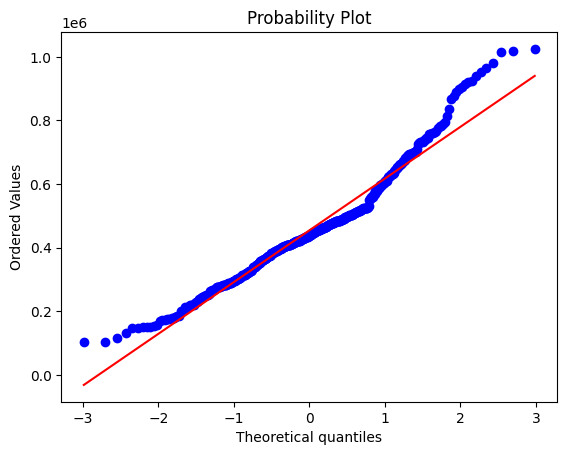

In [18]:
stats.probplot(df.MEDV, dist="norm", plot=plt)
plt.show()

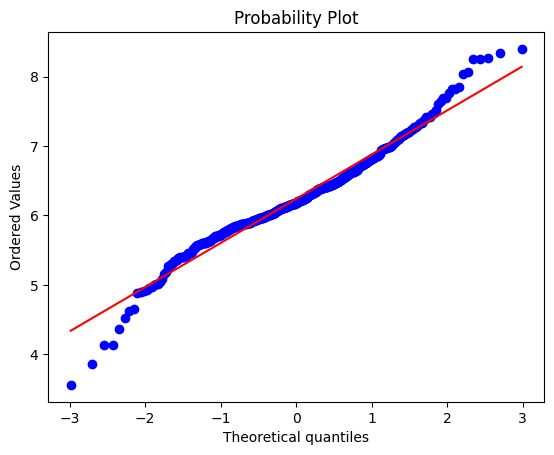

In [19]:
stats.probplot(df.RM, dist="norm", plot=plt)
plt.show()

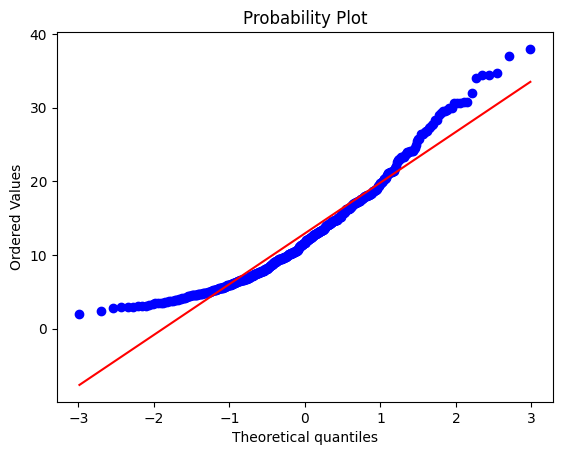

In [20]:
stats.probplot(df.LSTAT, dist="norm", plot=plt)
plt.show()

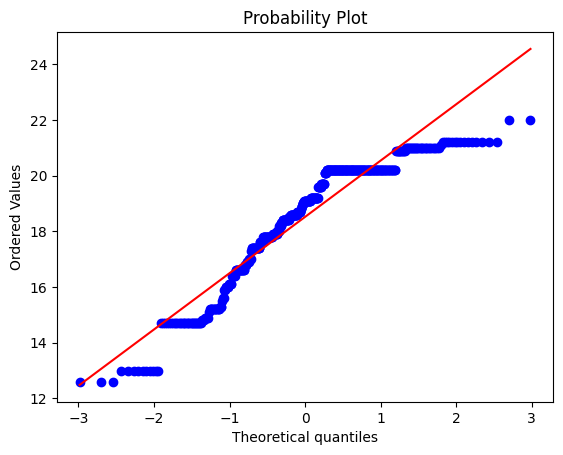

In [21]:
stats.probplot(df.PTRATIO, dist="norm", plot=plt)
plt.show()

### Distribuição (Visualização Gráfica)

In [22]:
import plotly.express as px

In [23]:
hist = px.histogram(df, x="MEDV", nbins=100)
hist.update_layout(width=800,height=500, title_text="Média dos valores")
hist.show()

In [24]:
hist = px.histogram(df, x="RM", nbins=100)
hist.update_layout(width=800,height=500, title_text="Média dos valores")
hist.show()

In [25]:
hist = px.histogram(df, x="LSTAT", nbins=100)
hist.update_layout(width=800,height=500, title_text="Média dos valores")
hist.show()

In [26]:
hist = px.histogram(df, x="PTRATIO", nbins=100)
hist.update_layout(width=800,height=500, title_text="Média dos valores")
hist.show()

### Teste de Distribuição: Shapiro-Wilk

In [27]:
# Teste Shapiro-Wilk:
# p > 0.05: distribuicao normal.
# p < 0.05: distribuicao anormal
result, p = stats.shapiro(df.MEDV)
print(p)
if p > 0.05:
  print("distribuicao normal")
else:
  print("distribuicao anormal")

2.5762864064304836e-10
distribuicao anormal


In [28]:

result, p = stats.shapiro(df.RM)
print(p)
if p > 0.05:
  print("distribuicao normal")
else:
  print("distribuicao anormal")

2.7085933496096004e-08
distribuicao anormal


In [29]:

result, p = stats.shapiro(df.LSTAT)
print(p)
if p > 0.05:
  print("distribuicao normal")
else:
  print("distribuicao anormal")

1.6900520425407878e-13
distribuicao anormal


In [30]:
result, p = stats.shapiro(df.PTRATIO)
print(p)
if p > 0.05:
  print("distribuicao normal")
else:
  print("distribuicao anormal")

9.07583957756611e-17
distribuicao anormal


### Testes de Distribuição:
#### Pearson, Spearman e Kendall

Pearson: distrbuicao normal  
Spearman: anormal  
Kendall: nao normal com poucas amostras

In [31]:
# Pearson:
#stats.pearsonr(df.MEDV, df.RM)

In [32]:
# Spearman:
stats.spearmanr(df.MEDV, df.RM) # no caso é essa aqui que importa, pq nossa distribuicao é anormal e temos varias amostras

SignificanceResult(statistic=0.6240572939087418, pvalue=3.845028634343325e-54)

In [33]:
# Kendall:
#stats.kendalltau(df.MEDV, df.RM)

In [34]:
correlacoes = df.corr(method='spearman')
correlacoes

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.624700,-0.282053,0.624057
LSTAT,-0.624700,1.000000,0.461739,-0.845527
PTRATIO,-0.282053,0.461739,1.000000,-0.559276
MEDV,0.624057,-0.845527,-0.559276,1.000000


# Regressão Linear Simples: 55.97%

## valor médio (MEDV) em relação com número de comodos médio (RM)

In [35]:
df.head(1)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0


In [36]:
x1 = df.iloc[:,0:1].values
x1

array([[6.575],
       [6.421],
       [7.185],
       [6.998],
       [7.147],
       [6.43 ],
       [6.012],
       [6.172],
       [5.631],
       [6.004],
       [6.377],
       [6.009],
       [5.889],
       [5.949],
       [6.096],
       [5.834],
       [5.935],
       [5.99 ],
       [5.456],
       [5.727],
       [5.57 ],
       [5.965],
       [6.142],
       [5.813],
       [5.924],
       [5.599],
       [5.813],
       [6.047],
       [6.495],
       [6.674],
       [5.713],
       [6.072],
       [5.95 ],
       [5.701],
       [6.096],
       [5.933],
       [5.841],
       [5.85 ],
       [5.966],
       [6.595],
       [7.024],
       [6.77 ],
       [6.169],
       [6.211],
       [6.069],
       [5.682],
       [5.786],
       [6.03 ],
       [5.399],
       [5.602],
       [5.963],
       [6.115],
       [6.511],
       [5.998],
       [5.888],
       [7.249],
       [6.383],
       [6.816],
       [6.145],
       [5.927],
       [5.741],
       [5.966],
       [

In [37]:
y = df.iloc[:, 3].values
y

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [38]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size = 0.3, random_state=10)

x_treino.shape, y_treino.shape

((342, 1), (342,))

In [39]:
x_teste.shape, y_teste.shape

((147, 1), (147,))

In [40]:
from sklearn.linear_model import LinearRegression
reg_linear1 = LinearRegression()
reg_linear1.fit(x_treino,y_treino)

LinearRegression()

In [41]:
# Intercepto: coeficiente linear
reg_linear1.intercept_

-626510.2699464143

In [42]:
# Coeficiente Angular
reg_linear1.coef_

array([173771.45170999])

(a funcao que a regressao encontrou foi: VMED = -626510.2 + 173771.45*RM)



In [43]:
# testando os dados
reg_linear1.score(x_treino, y_treino)

0.46368351515551953

In [44]:
reg_linear1.score(x_teste, y_teste)

0.5426573915930195

In [45]:


import matplotlib.pyplot as plt

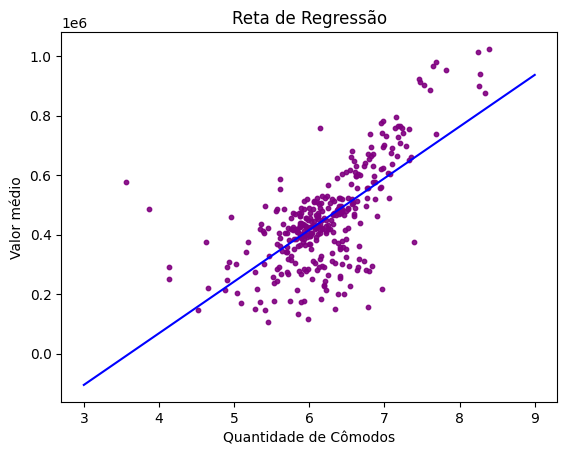

In [46]:
previsoes_treino = reg_linear1.predict(x_treino)

plt.scatter(y=y_treino, x=x_treino, color='purple', s=10, alpha=0.9)
x_plot = np.linspace(3,9)
plt.plot(x_plot, x_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='b')
plt.title("Reta de Regressão")
plt.ylabel("Valor médio")
plt.xlabel("Quantidade de Cômodos")
plt.show()

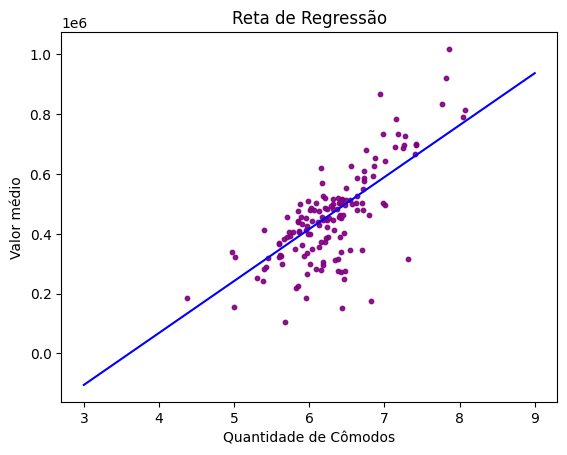

In [47]:
previsoes_teste = reg_linear1.predict(x_teste)

plt.scatter(y=y_teste, x=x_teste, color='purple', s=10, alpha=0.9)
x_plot = np.linspace(3,9)
plt.plot(x_plot, x_plot*reg_linear1.coef_ + reg_linear1.intercept_, color='b')
plt.title("Reta de Regressão")
plt.ylabel("Valor médio")
plt.xlabel("Quantidade de Cômodos")
plt.show()

## MEDV em relação a LSTAT

In [48]:
x2 = df.iloc[:, 1:2].values
y = df.iloc[:, 3].values

from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x2, y, test_size = 0.3, random_state=10)

from sklearn.linear_model import LinearRegression
reg_linear2 = LinearRegression()
reg_linear2.fit(x_treino,y_treino)

print(reg_linear2.intercept_)
print(reg_linear2.coef_)
# MEDV = 681977.74 - 17263.75*LSTAT

681977.7451055486
[-17263.75010515]


In [49]:
reg_linear2.score(x_treino, y_treino)

0.5688289563355992

In [50]:
reg_linear2.score(x_teste, y_teste)

0.6006038196307664

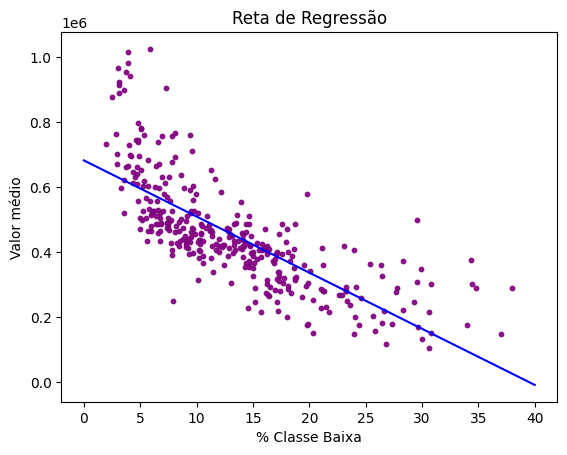

In [51]:
previsoes_treino = reg_linear2.predict(x_treino)

plt.scatter(y=y_treino, x=x_treino, color='purple', s=10, alpha=0.9)
x_plot = np.linspace(0,40)
plt.plot(x_plot, x_plot*reg_linear2.coef_ + reg_linear2.intercept_, color='b')
plt.title("Reta de Regressão")
plt.ylabel("Valor médio")
plt.xlabel("% Classe Baixa")
plt.show()

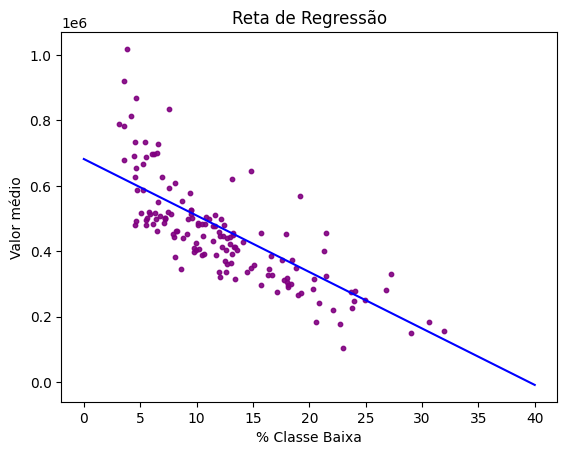

In [52]:
previsoes_teste = reg_linear2.predict(x_teste)

plt.scatter(y=y_teste, x=x_teste, color='purple', s=10, alpha=0.9)
x_plot = np.linspace(0,40)
plt.plot(x_plot, x_plot*reg_linear2.coef_ + reg_linear2.intercept_, color='b')
plt.title("Reta de Regressão")
plt.ylabel("Valor médio")
plt.xlabel("% Classe Baixa")
plt.show()

## Métricas de Desempenho

In [53]:
# Erro absoluto:
abs(y_teste - previsoes_teste).mean()

76340.55192245146

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [55]:
# Erro médio absoluto
mean_absolute_error(y_teste, previsoes_teste)

76340.55192245146

In [56]:
# Erro quadrático médio
mean_squared_error(y_teste, previsoes_teste)

9863567949.634668

In [57]:
# Raiz do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

99315.49702657017

## Validação Cruzada

In [58]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=15, shuffle=True, random_state=5)

from sklearn.model_selection import cross_val_score

In [59]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, x2, y, cv = kfold)
resultado

array([0.73997836, 0.52496442, 0.2753212 , 0.77336843, 0.7096672 ,
       0.34726472, 0.66194425, 0.68820343, 0.411042  , 0.5519506 ,
       0.5776707 , 0.37648029, 0.60443851, 0.64797086, 0.5056103 ])

In [60]:
print("Acurácia média: %.2f%%" % (resultado.mean()*100.0))

Acurácia média: 55.97%


## Avaliando a regressão linear simples com statsmodels

In [63]:
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [64]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [ ]:
x2 = df.iloc[:,1:2].values
x2

In [ ]:
y = df.iloc[:,3].values
y

In [67]:
# Criação do modelo
         # y variavel dependente / x2 variavel independente
regressao = smf.ols('y ~ x2', data=df).fit()

In [ ]:
# residuos: como os erros estao distribuidos. os pressupostos para avaliacao
residuos = regressao.resid
residuos

## Teste de normalidade dos resíduos

Ho = distribuicao normal: p > 0.05  
Ha = distribuicao anormal: p <= 0.05

In [70]:
estatistica, p = stats.shapiro(residuos)
print(f'Estatística: {estatistica}')
print(f'p-value: {p}')

# p é muito menor do que 0.05. entao a distribuicao é anormal

Estatística: 0.9171054363250732
p-value: 9.782326333115975e-16


In [ ]:
# também da pra analizar graficamente, vendo que os dados nao se encaixam no linear:
import scipy.stats as stats

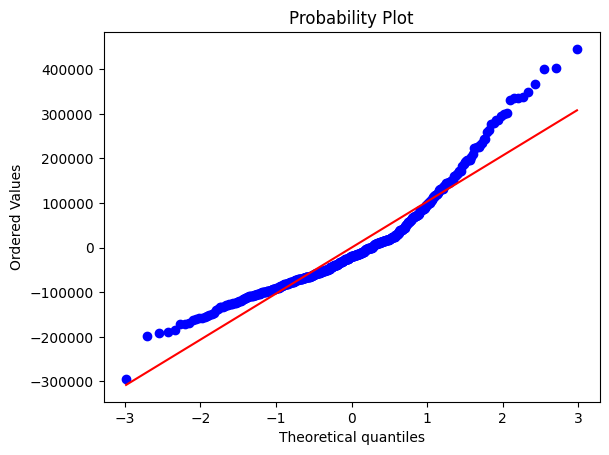

In [71]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.show()

## Análise da homocedasticidade dos resíduos
(resíduos com variação constante)

In [ ]:
plt.scatter(y=residuos, x=regressao.predict(), color='red')
plt.hlines(y=0, xmin=0, xmax=700000, color='orange')
plt.ylabel('resíduos')
plt.xlabel('valores preditos')
plt.show()

# da pra ver que a dispersao nao é consistente: temos uma heterocedasticidade nos residuos

In [ ]:
# vendo matematicamente, e nao graficamente:
# Ho = existe homocedasticidade: p > 0.05
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

estatistica, p, f, fp = sms.het_breuschpagan(regressao.resid, regressao.model.exog)
print(f'Estatística: {estatistica}')
print(f'p  value: {p}') # <---
print(f'f  value: {f}')
print(f'fp value: {fp}')

## Outliers nos resíduos
ideal: entre -3 e 3

In [77]:
outliers = regressao.outlier_test()

In [78]:
outliers.max() # aqui ta ruim, 4.23

student_resid    4.227468
unadj_p          0.999732
bonf(p)          1.000000
dtype: float64

In [79]:
outliers.min() # aqui ta ok, -2.76

student_resid   -2.762057
unadj_p          0.000028
bonf(p)          0.013809
dtype: float64

## Concluo; esse modelo de regressão linear simples não é consistente.

In [80]:
print(regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.579
Model:                            OLS   Adj. R-squared:                  0.578
Method:                 Least Squares   F-statistic:                     668.7
Date:                Sat, 25 Nov 2023   Prob (F-statistic):           1.93e-93
Time:                        17:30:27   Log-Likelihood:                -6357.8
No. Observations:                 489   AIC:                         1.272e+04
Df Residuals:                     487   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6.841e+05   1.01e+04     67.551      0.0

In [81]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

            Coeficientes
Intercept  684138.493068
x2         -17759.048327


Equação: MEDV = 684138.49 - 17759.05 LSTAT

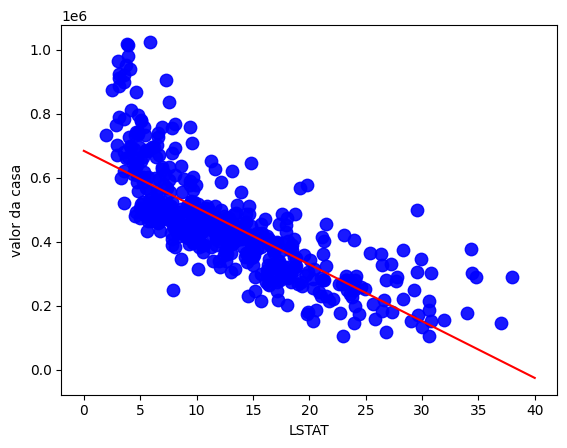

In [82]:
plt.scatter(y=df.MEDV, x=df.LSTAT, color='blue', s=80, alpha=0.9)
x_plot = np.linspace(0,40)
plt.plot(x_plot, regressao.params[0] + x_plot*regressao.params[1], color='r')
plt.ylabel('valor da casa')
plt.xlabel('LSTAT')
plt.show()

# azul = real
# vermelho = calculado

# Regressão Linear Múltipla: 69.25%

## Modelo

In [83]:
from sklearn.linear_model import LinearRegression

In [84]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [85]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [ ]:
independente.shape

In [ ]:
dependente = df.iloc[:, 3].values
dependente

In [92]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [93]:
multipla = LinearRegression()
multipla.fit(x_treino, y_treino)

LinearRegression()

In [95]:
multipla.intercept_

434789.4550955225

In [96]:
multipla.coef_

array([ 85325.36412937, -10775.41479323, -20133.58779106])

Equação: MEDV = 434789.45 + 85325.36 RM - 10775.41 LSTAT - 20133.58 PRATIO

In [97]:
# Coeficiente de determinação:
multipla.score(x_treino, y_treino)

0.7343049403294957

## Teste

In [ ]:
previsoes = multipla.predict(x_teste)
previsoes

In [99]:
multipla.score(x_teste, y_teste)
# coeficiente de determinacao (teste)

0.6817814124380092

## Métricas

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

71651.46435650405

In [ ]:
abs(y_teste - previsoes).mean()
# Erro absoluto

In [101]:
mean_absolute_error(y_teste, previsoes)
# Erro médio absoluto

71651.46435650405

In [102]:
mean_squared_error(y_teste, previsoes)
# Erro quadrático médio

9232768512.15146

In [103]:
np.sqrt(mean_squared_error(y_teste, previsoes))
# raiz do Erro quadrático médio

96087.2963099257

## Validação cruzada


In [104]:
from sklearn.model_selection import KFold, cross_val_score

In [106]:
# Separando os dados em folds
kfold = KFold(n_splits=15, shuffle=True, random_state=5)

In [107]:
# Criando o modelo
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()
resultado = cross_val_score(modelo, independente, dependente, cv=kfold)
resultado

# um grupo tem 83%, enquanto outro tem 45%. alguma coisa ta errada ai kk

array([0.83061794, 0.77028683, 0.46606666, 0.81532627, 0.79492754,
       0.60625828, 0.82164061, 0.7750116 , 0.58744519, 0.74753069,
       0.76227037, 0.51253844, 0.71206526, 0.73425176, 0.45176491])

In [109]:
# média e desvio padrão
print(f'Acurácia média: {100*resultado.mean():.2f} %')

Acurácia média: 69.25 %


## Avaliando a RLM (regressão linear múltipla) com statsmodels

In [110]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [112]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0


In [113]:
# Criação do modelo
modelo = smf.ols('MEDV ~ RM + LSTAT + PTRATIO', data=df).fit()

In [114]:
residuos = modelo.resid
residuos

0     -128371.739762
1      -71577.148313
2       81946.881920
3       76551.704130
4      148383.407464
           ...      
484     -1541.448492
485     -4797.202628
486    -46918.775678
487    -61950.456779
488   -192725.539836
Length: 489, dtype: float64

## Teste de normalidade dos resíduos

In [115]:
import scipy.stats as stats

In [116]:
# análise matemática:
estatistica, p = stats.shapiro(residuos)
print(f'Estatistica: {estatistica}')
print(f'p value: {p}')
# p <= 0.05. distribuicao anormal. ja vamos inconsistencia

Estatistica: 0.9633496403694153
p value: 1.0875824685285806e-09


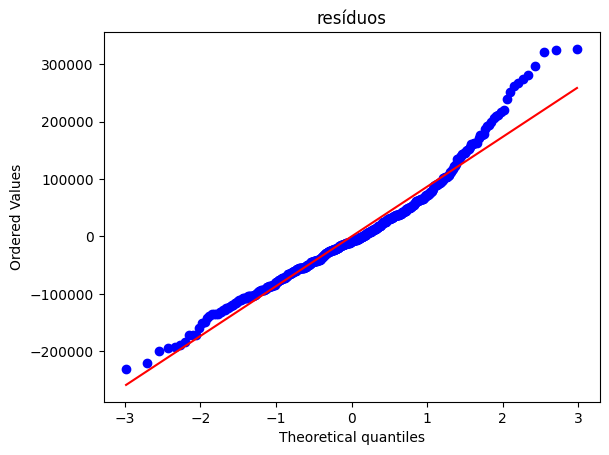

In [117]:
# análise gráfica:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("resíduos")
plt.show()

# do início até perto do final ta muito perto do vermelho, mas no final fica fora
# existe inconsistencia: embora apenas no final

## Análise da homocedasticidade

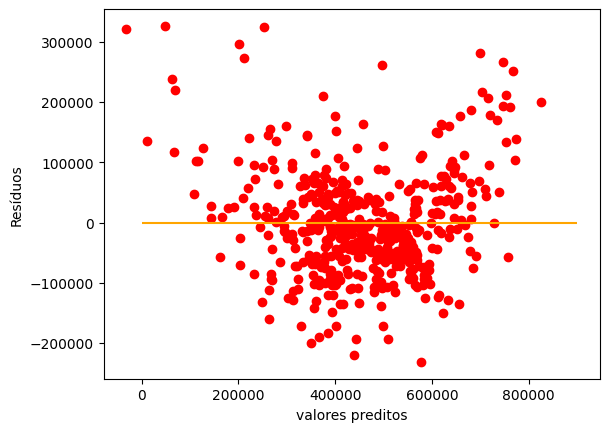

In [118]:
# teste grafico
plt.scatter(y = residuos, x=modelo.predict(), color='r')
plt.hlines(y = 0, xmin=0, xmax=900000, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('valores preditos')
plt.show()

# falha na distribuição. não existe tendência a serem simétricos

In [120]:
from statsmodels.compat import lzip

In [121]:
estatistica, p, f, fp = sms.het_breuschpagan(modelo.resid, modelo.model.exog)
print(f'Estatistica: {estatistica}')
print(f'p  value: {p}')
print(f'f  value: {f}')
print(f'fp value: {fp}')

# p <= 0.5; heterocedasticidade

Estatistica: 14.866517741157674
p  value: 0.0019343456956172854
f  value: 5.069079611723632
fp value: 0.0018260051160026575


## Outliers nos resíduos

In [126]:
outliers = modelo.outlier_test()

### ideal: entre -3 e 3

In [127]:
outliers.max()
# novamente; esse ta ruim

student_resid    3.887418
unadj_p          0.999502
bonf(p)          1.000000
dtype: float64

In [128]:
outliers.min()
# e esse ta ok

student_resid   -2.648018
unadj_p          0.000115
bonf(p)          0.056456
dtype: float64

## Ausência de Multicolinearidade
correlação entre as variáveis independentes
considerada multicolinear quando r > 0.9

In [129]:
variaveis = df[['RM', 'LSTAT', 'PTRATIO']]
variaveis.head(2)

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8


In [130]:
correlacoes = variaveis.corr(method='pearson')
correlacoes

,RM,LSTAT,PTRATIO
RM,1.000000,-0.612033,-0.304559
LSTAT,-0.612033,1.000000,0.360445
PTRATIO,-0.304559,0.360445,1.000000


## Análise do modelo

In [131]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     410.9
Date:                Sat, 25 Nov 2023   Prob (F-statistic):          9.96e-133
Time:                        18:44:24   Log-Likelihood:                -6259.9
No. Observations:                 489   AIC:                         1.253e+04
Df Residuals:                     485   BIC:                         1.254e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.155e+05   6.88e+04      6.035      0.0

In [132]:
df['previsao'] = modelo.fittedvalues
df.head()

,RM,LSTAT,PTRATIO,MEDV,previsao
0,6.575,4.98,15.3,504000.0,632371.739762
1,6.421,9.14,17.8,453600.0,525177.148313
2,7.185,4.03,17.8,728700.0,646753.118080
3,6.998,2.94,18.7,701400.0,624848.295870
4,7.147,5.33,18.7,760200.0,611816.592536


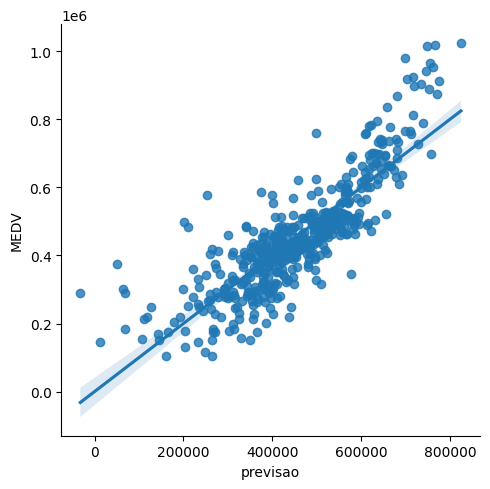

In [134]:
import seaborn as sns
sns.lmplot(x='previsao',y='MEDV', data=df)

# Regressão Polinomial: 53.91%
(.. não linear)

## Modelo

In [137]:
df.head()

,RM,LSTAT,PTRATIO,MEDV,previsao
0,6.575,4.98,15.3,504000.0,632371.739762
1,6.421,9.14,17.8,453600.0,525177.148313
2,7.185,4.03,17.8,728700.0,646753.118080
3,6.998,2.94,18.7,701400.0,624848.295870
4,7.147,5.33,18.7,760200.0,611816.592536


In [ ]:
x1 = df.iloc[:, 0:1].values
#x1

In [ ]:
y = df.iloc[:, 3].values
#y

In [143]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(x1, y, test_size=0.3, random_state=0)
x_treino.shape, y_treino.shape

((342, 1), (342,))

In [144]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [145]:
# Pré processamento
grau_polinomial = PolynomialFeatures(degree=2)

In [147]:
x_poly = grau_polinomial.fit_transform(x_treino)
x_poly
# x^0 | x^1 | x^2

array([[ 1.      ,  6.266   , 39.262756],
       [ 1.      ,  6.951   , 48.316401],
       [ 1.      ,  6.619   , 43.811161],
       ...,
       [ 1.      ,  6.021   , 36.252441],
       [ 1.      ,  6.03    , 36.3609  ],
       [ 1.      ,  6.02    , 36.2404  ]])

In [148]:
polinomial = LinearRegression()
polinomial.fit(x_poly, y_treino)
previsoes_treino = polinomial.predict(x_poly)

In [149]:
polinomial.coef_

array([      0.        , -568528.11104731,   60092.59048475])

In [150]:
polinomial.intercept_

1640107.0085836346

MEDV = 1640107 - 568528.11104731 RM + 60092.6 RM^2

In [151]:
numeros = np.linspace(3,9.84,342) # 342 (qtd de dados de treino) numeros de 3 até 9,84

In [152]:
valor = 1640107 - (568528.11104731*numeros) + (60092.6 * (numeros**2))

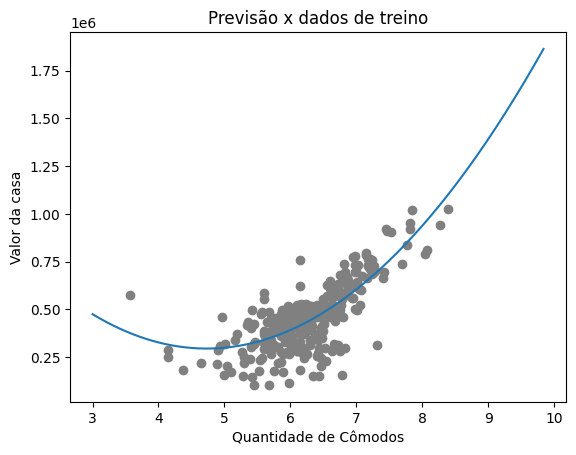

In [154]:
plt.scatter(x_treino, y_treino, c='gray')
plt.xlabel("Quantidade de Cômodos")
plt.ylabel("Valor da casa")
plt.title("Previsão x dados de treino")
plt.plot(numeros, valor)

# com menos de 5 comodos o valor da casa vai aumentando? tem certa incoerencia

In [155]:
comodos = 6
valor = 1640107 - (568528.11104731*comodos) + (60092.6 * (comodos**2))
valor

392271.93371613976

In [156]:
polinomial.score(x_poly, y_treino)

0.5864656525780776

## Teste

In [158]:
numeros2 = np.linspace(3,8.88,147)
numeros2.shape

(147,)

In [159]:
valor2 = 1640107 - (568528.11104731*numeros2) + (60092.6 * (numeros2**2))

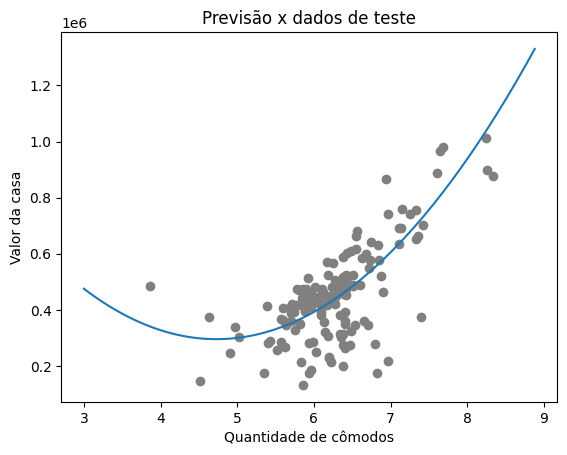

In [161]:
import matplotlib.pyplot as plt

plt.scatter(x_teste, y_teste, c='gray')
plt.xlabel("Quantidade de cômodos")
plt.ylabel("Valor da casa")
plt.title("Previsão x dados de teste")
plt.plot(numeros2, valor2)

In [164]:
x_poly_teste = grau_polinomial.fit_transform(x_teste)
polinomial_teste = LinearRegression()
polinomial_teste.fit(x_poly_teste, y_teste)
polinomial.score(x_poly_teste, y_teste)

0.5391879530755566

In [165]:
previsoes_teste = polinomial_teste.predict(x_poly_teste)

## Métricas

In [166]:
from sklearn.metrics import mean_squared_error
# Raiz do erro quadrático médio: RMSE
np.sqrt(mean_squared_error(y_teste,previsoes_teste))

114670.6264063004

# Regressão por Vetores de Suporte (SVR): 82.37%

## Modelo

In [198]:
df.head(2)

,RM,LSTAT,PTRATIO,MEDV,previsao
0,6.575,4.98,15.3,504000.0,632371.739762
1,6.421,9.14,17.8,453600.0,525177.148313


In [199]:
independente = df.iloc[:, 0:3].values
independente

array([[ 6.575,  4.98 , 15.3  ],
       [ 6.421,  9.14 , 17.8  ],
       [ 7.185,  4.03 , 17.8  ],
       ...,
       [ 6.976,  5.64 , 21.   ],
       [ 6.794,  6.48 , 21.   ],
       [ 6.03 ,  7.88 , 21.   ]])

In [200]:
dependente = df.iloc[:, 3].values
dependente

array([ 504000.,  453600.,  728700.,  701400.,  760200.,  602700.,
        480900.,  569100.,  346500.,  396900.,  315000.,  396900.,
        455700.,  428400.,  382200.,  417900.,  485100.,  367500.,
        424200.,  382200.,  285600.,  411600.,  319200.,  304500.,
        327600.,  291900.,  348600.,  310800.,  386400.,  441000.,
        266700.,  304500.,  277200.,  275100.,  283500.,  396900.,
        420000.,  441000.,  518700.,  646800.,  732900.,  558600.,
        531300.,  518700.,  445200.,  405300.,  420000.,  348600.,
        302400.,  407400.,  413700.,  430500.,  525000.,  491400.,
        396900.,  743400.,  518700.,  663600.,  489300.,  411600.,
        392700.,  336000.,  466200.,  525000.,  693000.,  493500.,
        407400.,  462000.,  365400.,  438900.,  508200.,  455700.,
        478800.,  491400.,  506100.,  449400.,  420000.,  436800.,
        445200.,  426300.,  588000.,  501900.,  520800.,  480900.,
        501900.,  558600.,  472500.,  466200.,  495600.,  6027

In [201]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [202]:
from sklearn.svm import SVR
SVR = SVR(kernel='poly')
SVR.fit(x_treino,y_treino)

SVR(kernel='poly')

In [203]:
SVR.score(x_treino, y_treino)

0.09376603879752266

In [204]:
SVR.score(x_teste, y_teste)
# 08.7% ???? pra SVR precisamos fazer padronização de escala (escalonamento)

0.087868724827049

## Padronização de escala

In [205]:
from sklearn.preprocessing import StandardScaler
x_scaler = StandardScaler()
x_treino_scaler = x_scaler.fit_transform(x_treino)

In [206]:
x_treino_scaler

array([[ 0.05327517, -0.70150711, -0.05467118],
       [ 1.12799963, -0.44487061, -0.52922816],
       [ 0.60711128, -0.79792304,  0.230063  ],
       ...,
       [-0.33111532, -0.36121561, -0.33940537],
       [-0.31699486,  0.84398345, -0.29194967],
       [-0.33268427, -0.38815536, -0.90887374]])

In [207]:
y_scaler = StandardScaler()
y_treino_scaler = y_scaler.fit_transform(y_treino.reshape(-1,1)) # reshape pq precisa ser 2D; e y_treino é 1D

In [208]:
y_treino_scaler

array([[-1.05925606e-02],
       [ 6.46900118e-01],
       [ 2.85923746e-01],
       [-1.13728667e-01],
       [ 1.44111599e-01],
       [-7.84113359e-01],
       [-1.24822584e+00],
       [-2.81324840e-01],
       [-1.39512694e-01],
       [-1.01616960e+00],
       [ 2.00056152e+00],
       [ 1.21414870e+00],
       [ 1.27860877e+00],
       [-1.52404707e-01],
       [ 9.04740384e-01],
       [ 2.29945267e-03],
       [-2.81324840e-01],
       [ 2.73031732e-01],
       [-2.81324840e-01],
       [ 2.73031732e-01],
       [ 4.27735892e-01],
       [ 2.60139719e-01],
       [-1.06773765e+00],
       [-1.17087376e+00],
       [ 3.49603506e+00],
       [ 9.04740384e-01],
       [-2.07331469e+00],
       [ 1.69895626e-01],
       [ 4.27735892e-01],
       [ 2.76119030e+00],
       [-3.45784907e-01],
       [ 2.73031732e-01],
       [-1.48028208e+00],
       [ 1.57003612e-01],
       [-1.91080747e-01],
       [-1.01616960e+00],
       [ 3.37491799e-01],
       [-2.34845740e-02],
       [ 1.9

In [209]:
x_teste_scaler = x_scaler.transform(x_teste)
y_teste_scaler = y_scaler.transform(y_teste.reshape(-1,1))

In [210]:
from sklearn.svm import SVR
SVR2 = SVR(kernel='rbf')
SVR2.fit(x_treino_scaler, y_treino_scaler.ravel()) # ravel pra passar de 2D pra 1D

SVR()

In [211]:
SVR2.score(x_treino_scaler, y_treino_scaler)

0.8714780218682298

## Teste

In [212]:
SVR2.score(x_teste_scaler, y_teste_scaler)

0.8141963480712318

In [213]:
previsoes_teste = SVR2.predict(x_teste_scaler)
previsoes_teste

array([-2.15791224e-01,  1.10142277e+00, -6.88494535e-01, -1.07563769e+00,
        3.01247352e-01, -9.98869785e-01, -5.59722487e-01, -2.77421653e-01,
       -2.73937823e-02, -4.12691897e-01, -1.16997042e+00, -5.18534667e-01,
       -2.21332947e-02, -1.40012104e+00,  2.00513309e-02, -7.36008350e-01,
       -6.93655466e-02,  5.92234013e-01, -2.48820576e-01,  1.07290408e+00,
        1.76335951e+00,  1.75215955e+00, -1.13186294e+00, -9.89244717e-02,
       -2.62519149e-01,  2.76202189e+00,  1.95334571e+00,  2.71163016e+00,
       -3.10648675e-01, -2.12642736e-01, -9.48038395e-01, -3.73399265e-01,
        1.92487075e-03,  1.41767802e+00, -1.05707405e-01,  2.19221752e+00,
        6.84125100e-02, -1.21422076e+00,  1.73245025e-01,  5.77702833e-01,
       -1.14127434e+00, -3.64357403e-01, -2.10842559e-01,  1.39103054e-01,
       -6.03862563e-01, -4.32397688e-01,  2.77358169e-01, -7.89247973e-01,
        1.58912076e+00, -2.49546698e-01,  1.47592810e+00, -1.13924390e-01,
        8.76296120e-01, -

## Revertendo a transformação

In [214]:
y_teste_inverse = y_scaler.inverse_transform(y_teste_scaler)
previsoes_inverse = y_scaler.inverse_transform(previsoes_teste.reshape(-1, 1))

## Métricas

In [215]:
from sklearn.metrics import mean_squared_error
# rooted mean squared error
np.sqrt(mean_squared_error(y_teste_inverse, previsoes_inverse))

73422.6955166514

## Validação cruzada

In [220]:
from sklearn.preprocessing import StandardScaler
x = StandardScaler()
independente_scaler = x.fit_transform(independente)
dependente_scaler = x.fit_transform(dependente.reshape(-1,1))

In [221]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=15, shuffle=True, random_state=5)

In [223]:
# Criando o modelo
from sklearn.svm import SVR
modelo = SVR(kernel='rbf')
resultado = cross_val_score(modelo, independente_scaler, dependente_scaler.ravel(), cv=kfold)
resultado

array([0.92812888, 0.84684121, 0.77550142, 0.84579676, 0.87130224,
       0.73027848, 0.8773257 , 0.8323081 , 0.81165058, 0.86738849,
       0.91428868, 0.65473478, 0.78365184, 0.83876782, 0.77741225])

In [225]:
print(f'Acurácia média: {resultado.mean()*100:.2f}%')

Acurácia média: 82.37%


# Regressão com árvore de decisão: 74.60%

## Modelo

In [226]:
independente = df.iloc[:, 0:3].values
dependente = df.iloc[:, 3].values

In [227]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)
x_treino.shape, y_teste.shape

((342, 3), (147,))

In [228]:
from sklearn.tree import DecisionTreeRegressor
arvore = DecisionTreeRegressor(max_depth=10, random_state=10)
arvore.fit(x_treino, y_treino)
arvore.score(x_treino, y_treino)

# 98.73% já ????????????????????

0.9873174163580706

## Teste

In [229]:
arvore.score(x_teste, y_teste)
# 79.17%. teve overfitting. vamos diminuir o max_depth

0.7917481928410943

In [237]:
arvore = DecisionTreeRegressor(max_depth=5, random_state=10)
arvore.fit(x_treino, y_treino)
arvore.score(x_treino, y_treino)

0.9050951127606555

In [239]:
arvore.score(x_teste, y_teste)
# agora ficou melhor. 82.57%

0.8256951550328737

In [240]:
previsoes_teste = arvore.predict(x_teste)

## Métricas

In [241]:
from sklearn.metrics import mean_squared_error
# raiz do erro quadratico medio
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

71114.46235713077

## Validação cruzada

In [242]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=15, shuffle=True, random_state=5)

In [243]:
from sklearn.tree import DecisionTreeRegressor
modelo = DecisionTreeRegressor(max_depth=5, random_state=10)
resultado = cross_val_score(modelo, independente, dependente, cv=kfold)
resultado

array([0.9107871 , 0.91994845, 0.70416127, 0.79571349, 0.64537243,
       0.62424022, 0.83188854, 0.77916943, 0.74608406, 0.45125985,
       0.92525406, 0.72678715, 0.72120525, 0.84170908, 0.56581873])

In [245]:
print(f'Coeficiente de determinação média: {resultado.mean()*100:.2f}%')

Coeficiente de determinação média: 74.60%


# Regressão com Random Forest: 82.85%

## Modelo

In [246]:
independente = df.iloc[:, 0:3].values
dependente   = df.iloc[:,   3].values

In [248]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [259]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor(n_estimators=60, criterion='squared_error', max_depth=5, random_state=10)
random.fit(x_treino, y_treino)

print(f'Treino: {random.score(x_treino, y_treino):.2f}%')
print(f'Teste: {random.score(x_teste, y_teste):.2f}%')

Treino: 0.92%
Teste: 0.85%


## Métricas

In [262]:
previsoes_teste = random.predict(x_teste)

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

66729.326795011

## Validação cruzada

In [263]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=15, shuffle=True, random_state=5)

In [265]:
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor(n_estimators=60, criterion='squared_error',max_depth=5, random_state=10)
resultado = cross_val_score(modelo, independente, dependente, cv=kfold)
print(f'Coeficiente de determinação médio: {resultado.mean()*100:.2f}%')

Coeficiente de determinação médio: 82.85%


# Regressão com XGBoost: 83.15%

## Modelo

In [266]:
independente = df.iloc[:, 0:3].values
dependente   = df.iloc[:,   3].values

In [267]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [272]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective="reg:squarederror")
xgboost.fit(x_treino, y_treino)

print(f'Treino: {xgboost.score(x_treino, y_treino)*100:.2f}%')
print(f'Teste: {xgboost.score(x_teste, y_teste)*100:.2f}%')

Treino: 0.93%
Teste: 0.84%


## Métricas

In [273]:
previsoes_teste = xgboost.predict(x_teste)

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

68238.85056825109

## Validação cruzada

In [274]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=15, shuffle=True, random_state=5)

In [275]:
from xgboost import XGBRegressor
modelo = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective="reg:squarederror")
resultado = cross_val_score(modelo, independente, dependente, cv=kfold)
print(f'Coeficiente de determinação médio: {resultado.mean()*100:.2f}%')

Coeficiente de determinação médio: 83.15%


In [ ]:
independente = df.iloc[:, 0:3].values
dependente   = df.iloc[:,   3].values

In [ ]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [ ]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(n_estimators=180, max_depth=3, learning_rate=0.05, objective="reg:squarederror")
xgboost.fit(x_treino, y_treino)

print(f'Treino: {xgboost.score(x_treino, y_treino):.2f}%')
print(f'Teste: {xgboost.score(x_teste, y_teste):.2f}%')

Treino: 0.93%
Teste: 0.84%


In [ ]:
previsoes_teste = xgboost.predict(x_teste)

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

68238.85056825109

# Regressão com LightGBM: 82.38%

## Modelo

In [278]:
independente = df.iloc[:, 0:3].values
dependente   = df.iloc[:,   3].values

In [279]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [277]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb
lgbm = lgb.LGBMRegressor(num_leaves=50, max_depth=3, learning_rate=0.1, n_estimators=50)
lgbm.fit(x_treino, y_treino);

In [290]:
print(f'Treino: {lgbm.score(x_treino, y_treino)*100:.2f}%')
print(f'Teste: {lgbm.score(x_teste, y_teste)*100:.2f}%')

Treino: 0.88%
Teste: 0.82%


## Métricas

In [291]:
previsoes_teste = lgbm.predict(x_teste)

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

71906.49585704789

## Validação cruzada

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=15, shuffle=True, random_state=5)

In [ ]:
import lightgbm as lgb
modelo = lgb.LGBMRegressor(num_leaves=50, max_depth=3, learning_rate=0.1, n_estimators=50)
resultado = cross_val_score(modelo, independente, dependente, cv=kfold)

In [294]:
print(f'Coeficiente de determinação médio: {resultado.mean()*100:.2f}%')

Coeficiente de determinação médio: 82.38%


# Regressão com CatBoost: 83.40%

## Modelo

In [ ]:
!pip install catboost

In [296]:
independente = df.iloc[:, 0:3].values
dependente   = df.iloc[:,   3].values

In [297]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(independente, dependente, test_size=0.3, random_state=0)
x_treino.shape, x_teste.shape

((342, 3), (147, 3))

In [ ]:
from catboost.core import CatBoostRegressor
catboost = CatBoostRegressor(iterations=100, learning_rate=0.08, depth=5, random_state=10)
catboost.fit(x_treino, y_treino)

In [300]:
print(f'Treino: {xgboost.score(x_treino, y_treino)*100:.2f}%')
print(f'Teste: {xgboost.score(x_teste, y_teste)*100:.2f}%')

Treino: 92.89%
Teste: 83.95%


## Métricas

In [301]:
previsoes_teste = catboost.predict(x_teste)

from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_teste, previsoes_teste))

69053.3516855943

## Validação cruzada

In [302]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=15, shuffle=True, random_state=5)

In [ ]:
from catboost.core import CatBoostRegressor
modelo = CatBoostRegressor(iterations=100, learning_rate=0.08, depth=5, random_state=10)
resultado = cross_val_score(modelo, independente, dependente, cv=kfold)

In [305]:
print(f'Coeficiente de determinação médio: {resultado.mean()*100:.2f}%')

Coeficiente de determinação médio: 83.40%


# Salvando dados para deploy

In [306]:
independente = df.iloc[:, 0:3].values
dependente   = df.iloc[:,   3].values

In [307]:
np.savetxt('independente.csv', independente, delimiter=',')
np.savetxt('dependente.csv', dependente, delimiter=',')